In [116]:
import irondb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df_original = irondb.sql_get('cookies','cookies_quality')

In [118]:
#df_original.to_csv('cookies.csv')

In [119]:
df_original.isnull().sum() #We can set id as index

id                       0
sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   0
crunch factor            0
aesthetic appeal         0
dtype: int64

In [120]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 17 columns):
id                      5198 non-null int64
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5198 non-null object
crunch factor           5198 non-null object
aesthetic appeal        5198 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 690.4+ KB


In [159]:
df = df_original.copy()

In [160]:
df.set_index('id', inplace = True)

In [161]:
df.dropna(inplace = True)

In [162]:
df.isna().sum()

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
diameter                0
mixins                  0
crunch factor           0
aesthetic appeal        0
dtype: int64

In [163]:
df['butter type'].value_counts()

melted    3908
cubed     1275
Name: butter type, dtype: int64

In [164]:
df['aesthetic appeal'].value_counts() #This columns is not giving us so much information, so we are going to delete it

3    5180
4       3
Name: aesthetic appeal, dtype: int64

In [165]:
df.drop(columns = 'aesthetic appeal', inplace = True)

In [166]:
df['mixins'].value_counts()

chocolate                         1892
raisins                           1196
chocolate, oats                    745
nuts, chocolate                    519
nuts,raisins                       331
nuts, oats, chocolate              293
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
                                     2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [167]:
df['crunch factor'] = pd.to_numeric(df['crunch factor'], errors = "coerce")

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5183 entries, 1 to 5198
Data columns (total 15 columns):
sugar to flour ratio    5183 non-null float64
sugar index             5183 non-null float64
bake temp               5183 non-null int64
chill time              5183 non-null float64
calories                5183 non-null float64
density                 5183 non-null float64
pH                      5183 non-null float64
grams baking soda       5183 non-null float64
bake time               5183 non-null float64
quality                 5183 non-null int64
butter type             5183 non-null object
weight                  5183 non-null float64
diameter                5183 non-null int64
mixins                  5183 non-null object
crunch factor           5183 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 647.9+ KB


In [169]:
flavours= ['raisins', 'nuts', 'chocolate', 'oats', 'peanut butter']
for flavour in flavours:
    df[flavour] = 0

for flavour in flavours:
    df[flavour] = np.where(df['mixins'].str.contains(flavour), 1, 0)

In [170]:
df.drop(columns = ['mixins', 'diameter'], inplace = True)

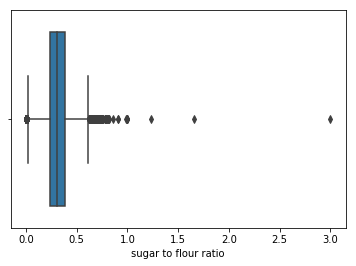

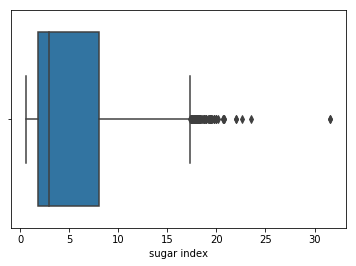

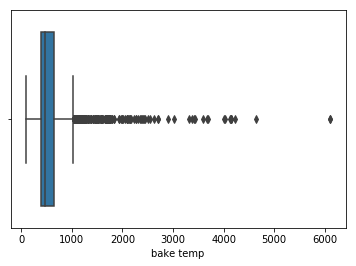

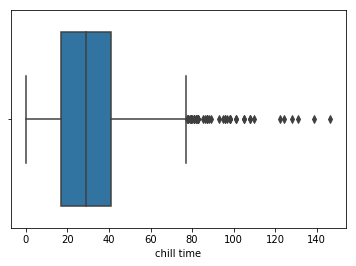

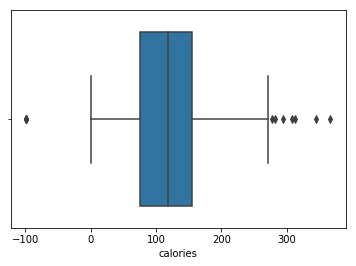

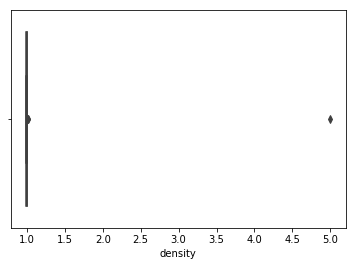

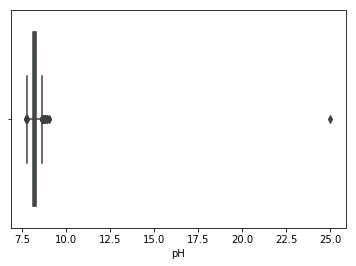

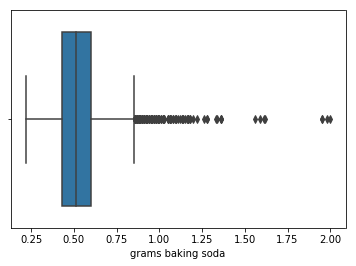

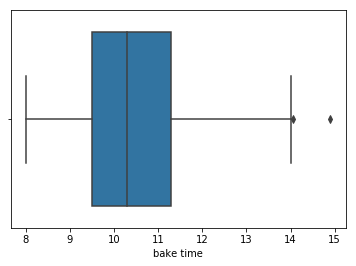

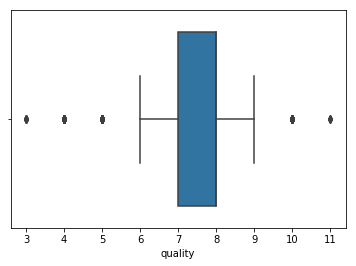

TypeError: cannot perform reduce with flexible type

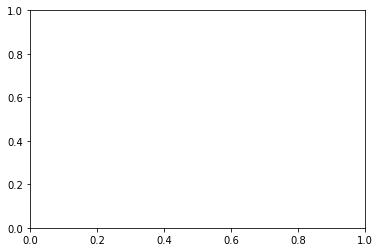

In [180]:
for i in list(df.columns):
    sns.boxplot(df[i])
    plt.show()

In [183]:
df['bake temp'].describe()

count    5180.000000
mean      559.729730
std       353.285307
min        90.000000
25%       380.000000
50%       470.000000
75%       640.000000
max      6110.000000
Name: bake temp, dtype: float64

In [181]:
df.drop(index=df[df['sugar to flour ratio'] > 1.0].index, inplace=True)

In [186]:
df['bake temp'] = df['bake temp'].apply(lambda x: 640 if x > 640 else x)

In [187]:
df['bake temp'].describe()

count    5180.000000
mean      479.413127
std       126.302456
min        90.000000
25%       380.000000
50%       470.000000
75%       640.000000
max       640.000000
Name: bake temp, dtype: float64

In [ ]:
df['calories'].value_counts()

In [188]:
df.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,raisins,nuts,chocolate,oats,peanut butter
count,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000
mean,0.317139,5.401911,479.413127,30.368726,114.949517,0.995438,8.222087,0.531014,10.495097,7.324324,14.384691,1.499280,0.299614,0.241313,0.675676,0.226834,0.013514
std,0.143444,4.669464,126.302456,17.256768,56.455746,0.055728,0.283680,0.151009,1.194220,1.303162,3.027469,0.289214,0.458133,0.427921,0.468167,0.418825,0.115471
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,1.500000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996910,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,31.600000,640.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
df.diameter.value_counts()

7    5182
Name: diameter, dtype: int64

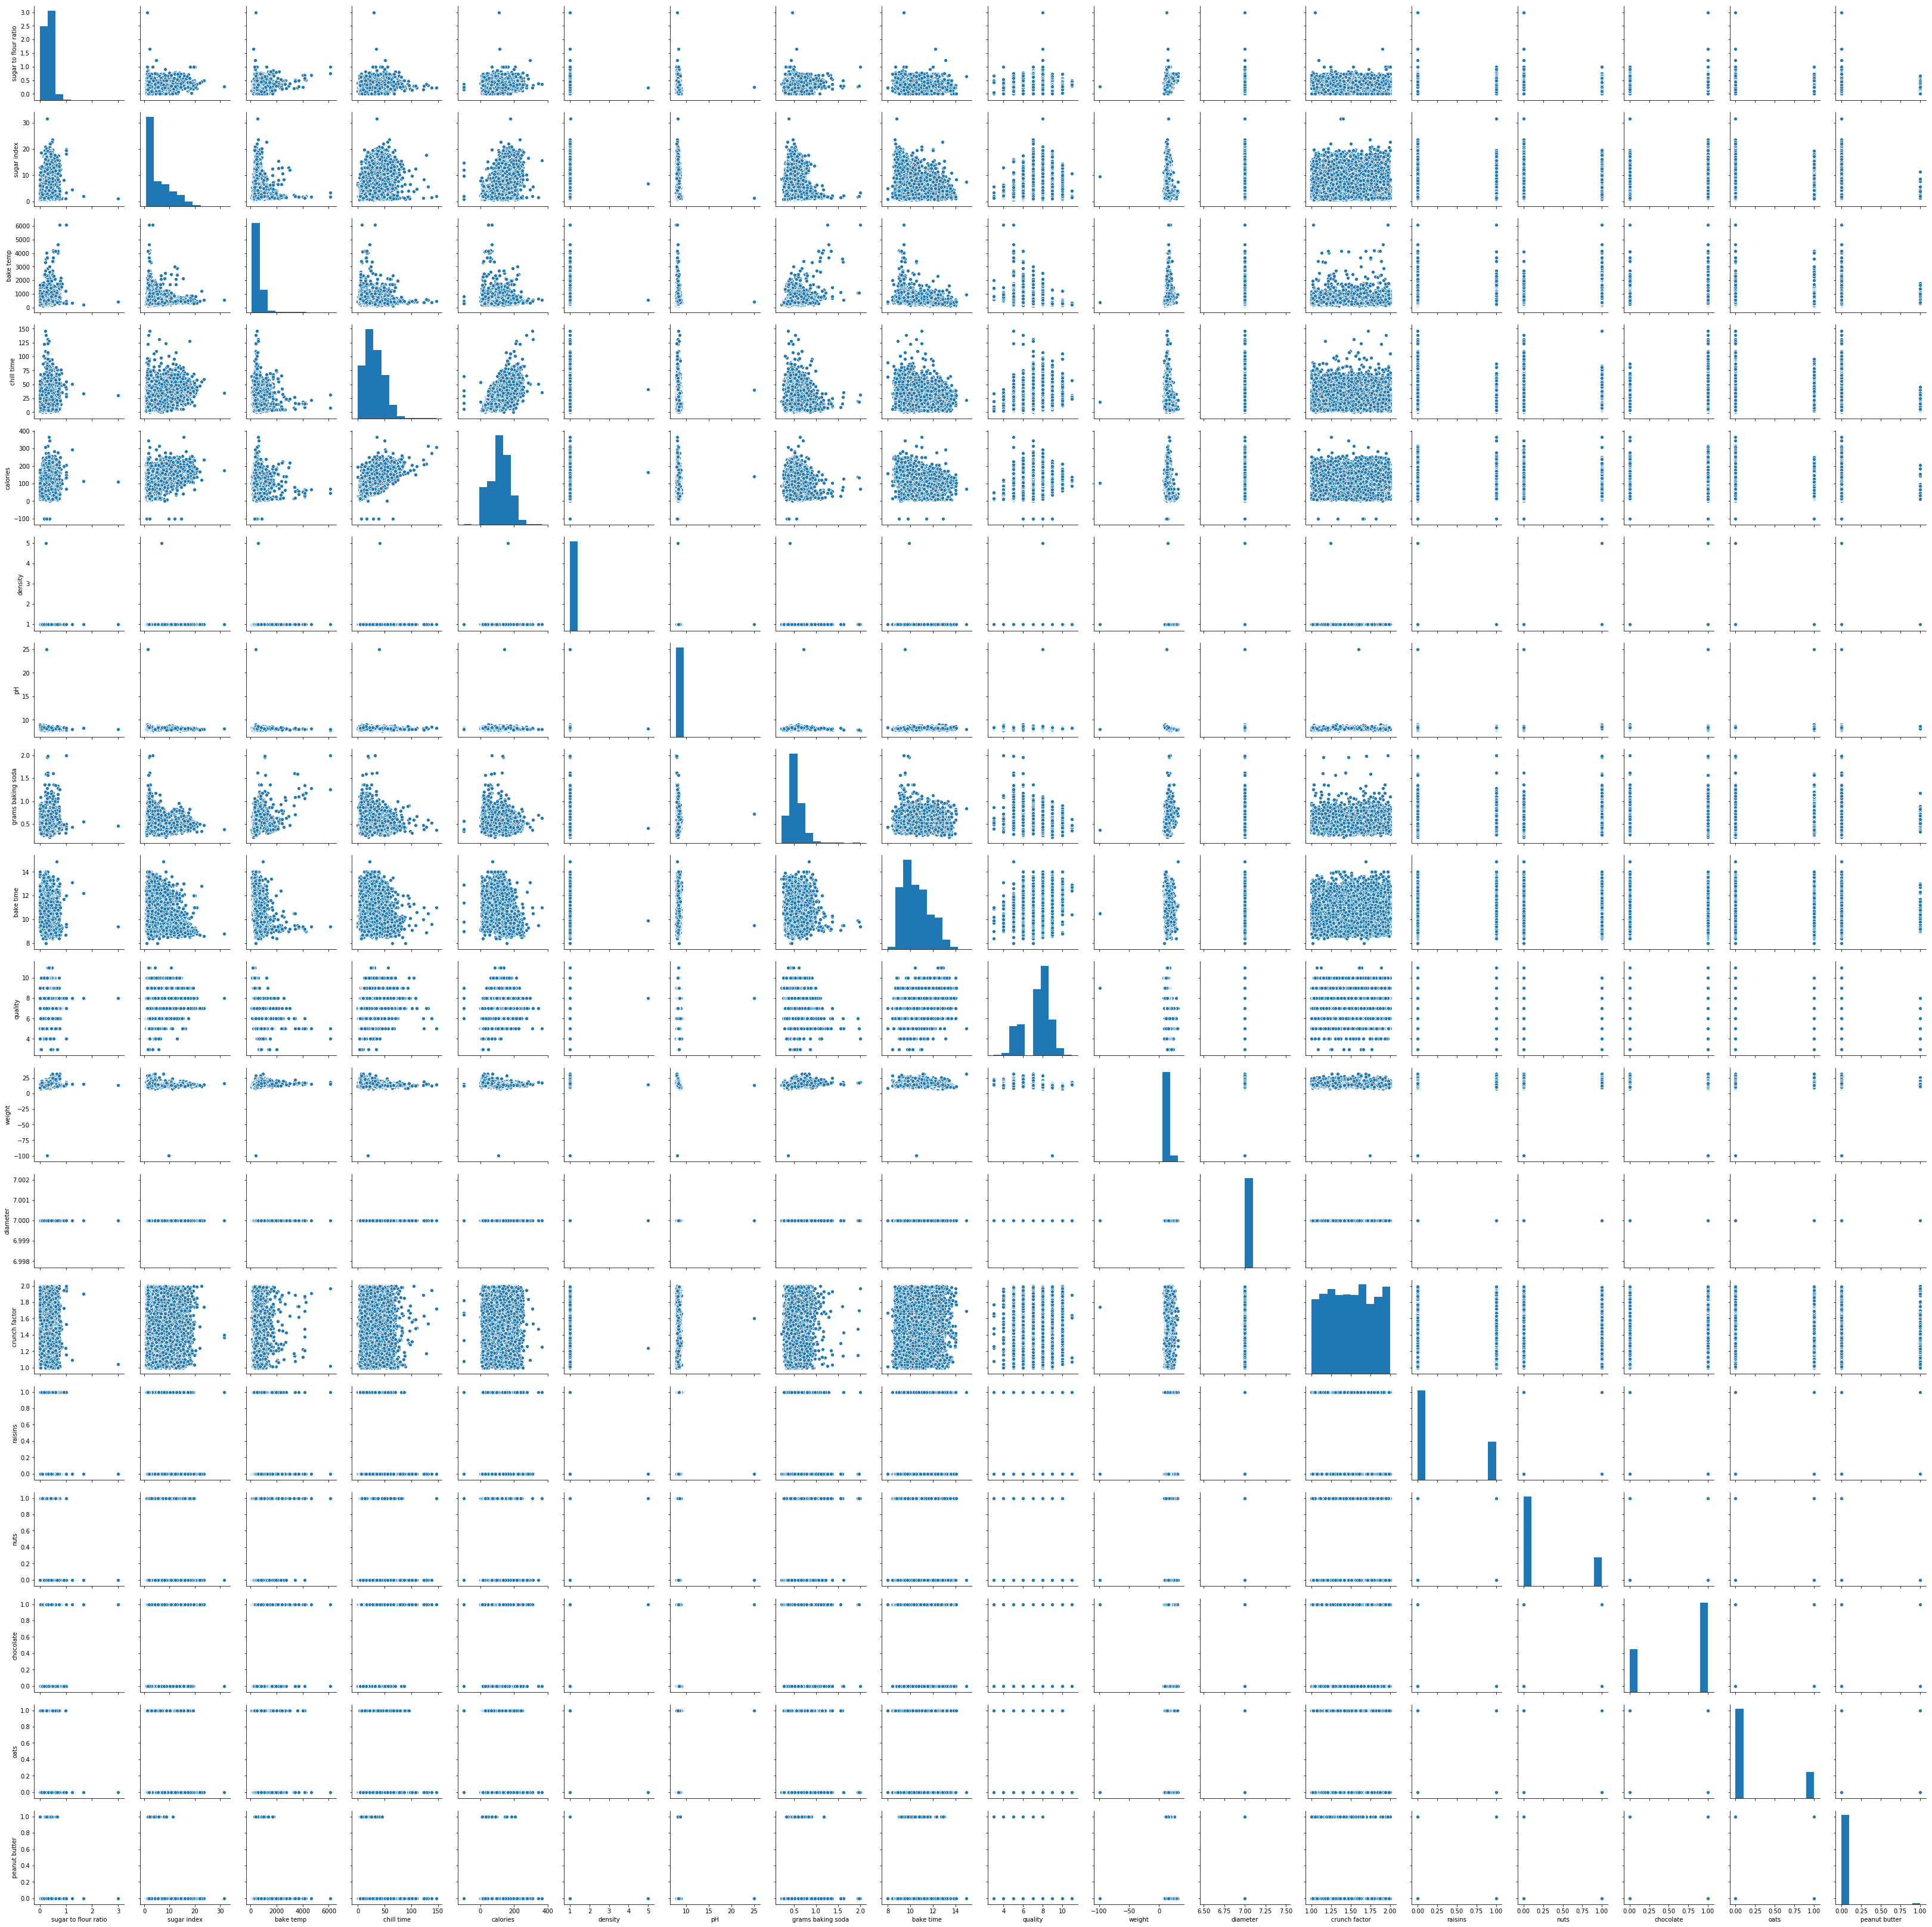

In [61]:
sns.pairplot(df)

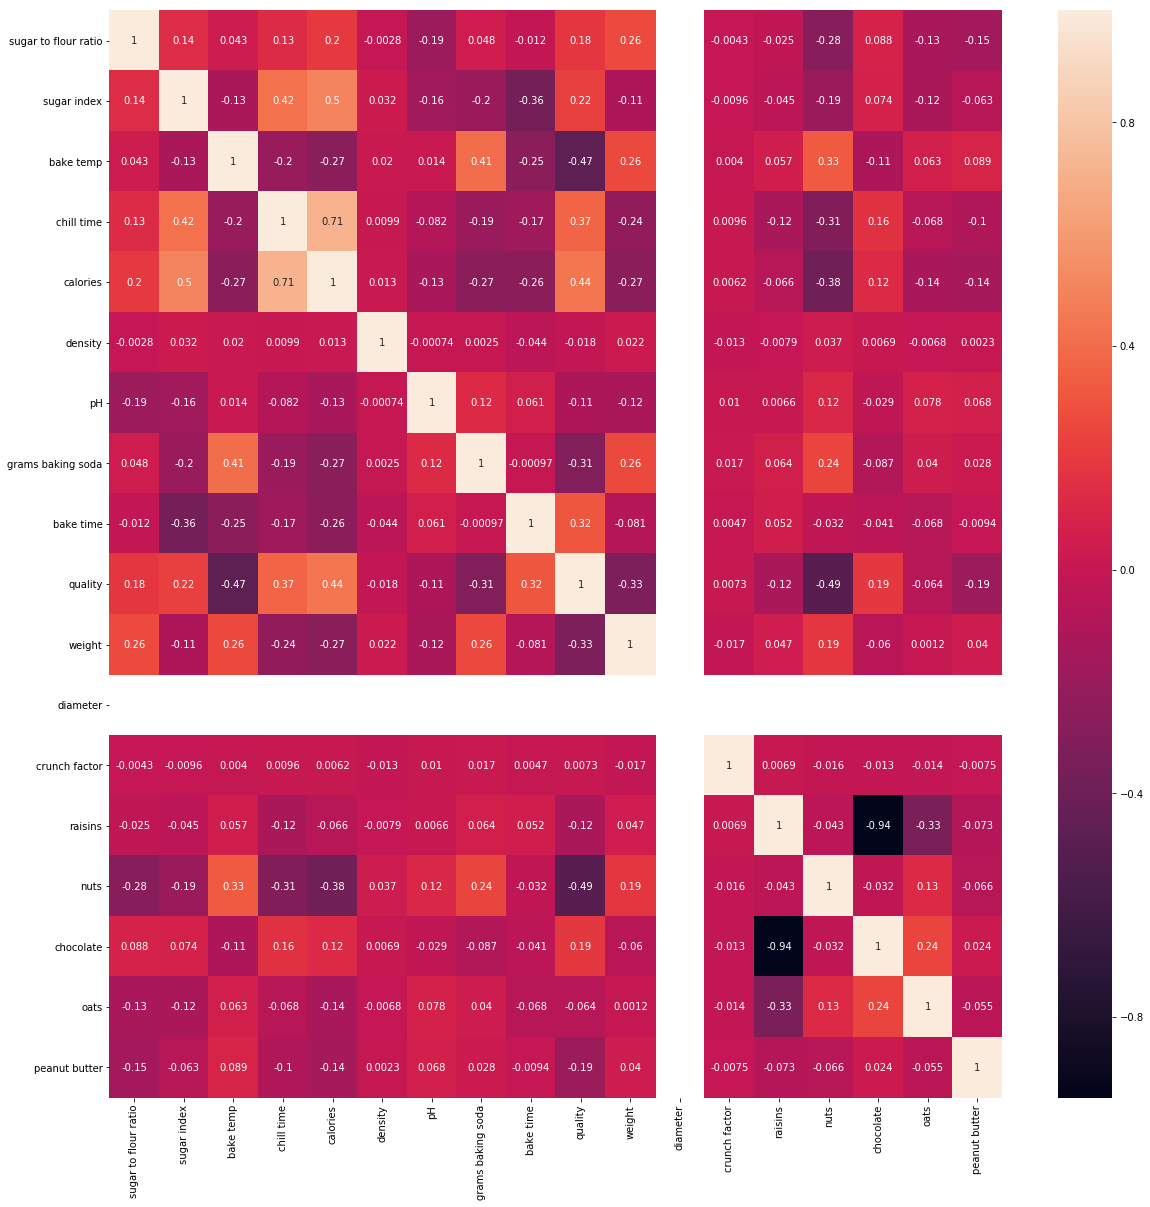

In [64]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)